In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
file_index= np.arange(1,9)
print(file_index)
data_files = []
for i in file_index:
    data_files.append(pd.read_csv('clean_subject'+str(i)+'.csv'))
print(data_files)

[1 2 3 4 5 6 7 8]
[       Unnamed: 0  Time:512Hz  Epoch  Electrode  Event Id
0            7680   15.000000    240       -5.0       0.0
1            7681   15.001953    240       36.0       0.0
2            7682   15.003906    240       67.0       0.0
3            7683   15.005859    240       52.0       0.0
4            7684   15.007812    240        8.0       0.0
5            7685   15.009766    240        9.0       0.0
6            7686   15.011719    240       18.0       0.0
7            7687   15.013672    240       83.0       0.0
8            7688   15.015625    240      144.0       0.0
9            7689   15.017578    240      107.0       0.0
10           7690   15.019531    240       71.0       0.0
11           7691   15.021484    240       81.0   33552.0
12           7692   15.023438    240       55.0       0.0
13           7693   15.025391    240       34.0       0.0
14           7694   15.027344    240       54.0       0.0
15           7695   15.029297    240       70.0      

(82944,)
(61952,)
(108640,)
(113952,)
(502112,)
(127776,)
(116768,)
(151552,)


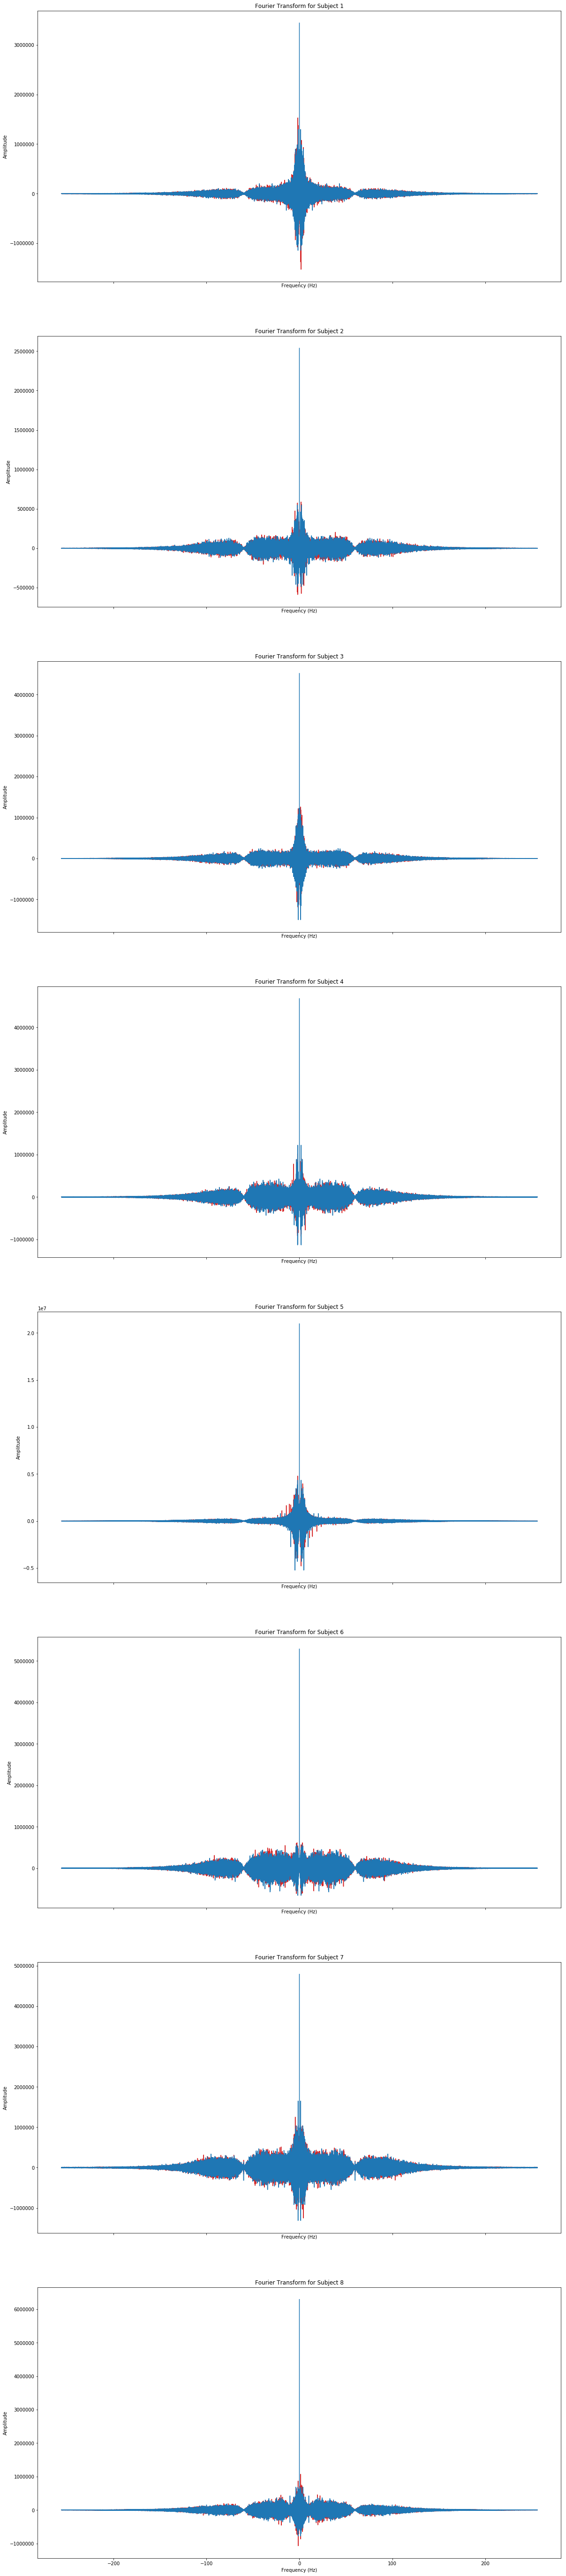

In [3]:
fft_data = []
fft_freq = []
for ind in file_index:
    fft_data.append(np.fft.fft(data_files[ind-1]['Electrode']))
    print(data_files[ind-1]['Electrode'].shape)
    fft_freq.append(np.fft.fftfreq(data_files[ind-1]['Electrode'].shape[0], 1/512))
    
f, axes = plt.subplots(8,1, sharex=True, figsize=(20, 100))
subnum = 1
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], fft_data[ind-1].imag, color='tab:red')
    axes[ind-1].plot(fft_freq[ind-1], fft_data[ind-1].real, color='tab:blue')
    axes[ind-1].set_title('Fourier Transform for Subject %s' % (subnum,))
    axes[ind-1].set_xlabel('Frequency (Hz)')
    axes[ind-1].set_ylabel('Amplitude')
    subnum+=1
plt.show()


In [4]:
'''
f, axes = plt.subplots(8,1, figsize=(8,40))
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], np.abs(fft_data[ind-1])/sum())
    axes[ind-1].set_xlim(-60,60)
    axes[ind-1].set_ylim(-5,1000000000000)
plt.show()
'''

'\nf, axes = plt.subplots(8,1, figsize=(8,40))\nfor ind in file_index:\n    axes[ind-1].plot(fft_freq[ind-1], np.abs(fft_data[ind-1])/sum())\n    axes[ind-1].set_xlim(-60,60)\n    axes[ind-1].set_ylim(-5,1000000000000)\nplt.show()\n'

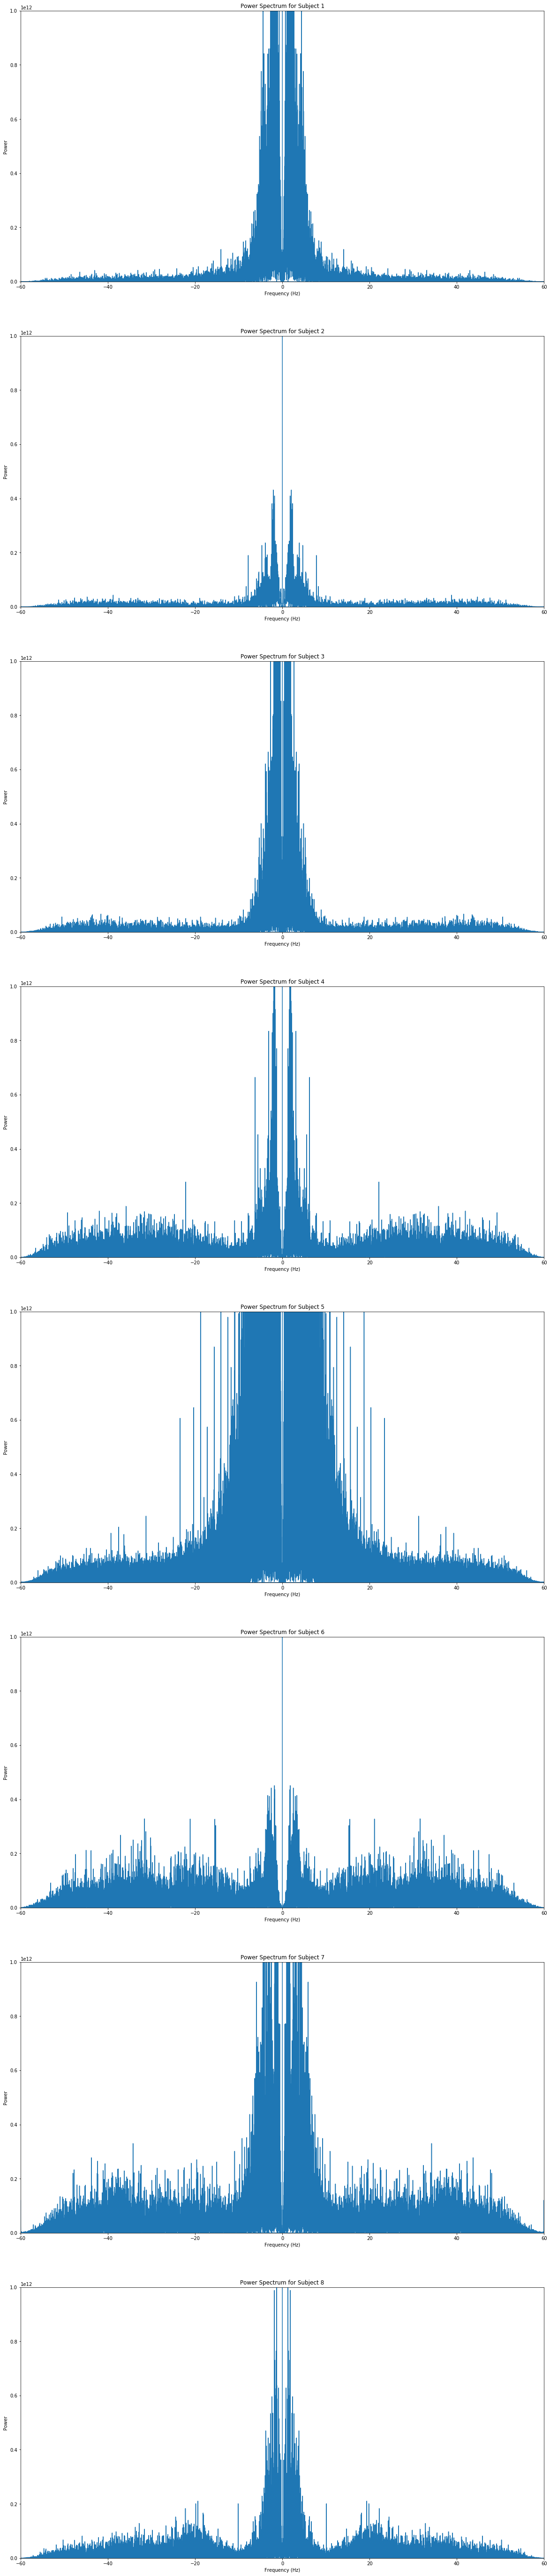

In [5]:
f, axes = plt.subplots(8,1, figsize=(20,100))
subnum = 1
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], np.abs(fft_data[ind-1])**2)
    axes[ind-1].set_xlim(-60,60)
    axes[ind-1].set_ylim(-5,1000000000000)
    axes[ind-1].set_title('Power Spectrum for Subject %s' % (subnum,))
    axes[ind-1].set_xlabel('Frequency (Hz)')
    axes[ind-1].set_ylabel('Power')
    subnum+=1
f.subplots_adjust(hspace=0.2)
plt.rcParams.update({'font.size': 18})
plt.show()

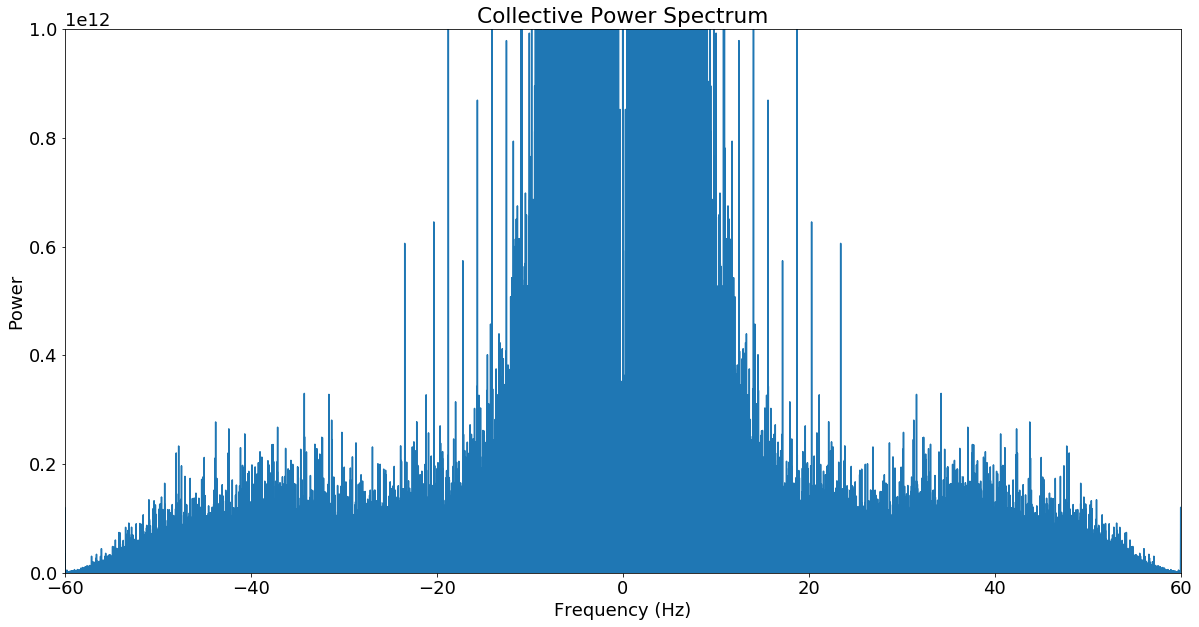

In [6]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(fft_freq[0], np.abs(fft_data[0])**2, color='tab:blue')
ax.plot(fft_freq[1], np.abs(fft_data[1])**2, color='tab:blue')
ax.plot(fft_freq[2], np.abs(fft_data[2])**2, color='tab:blue')
ax.plot(fft_freq[3], np.abs(fft_data[3])**2, color='tab:blue')
ax.plot(fft_freq[4], np.abs(fft_data[4])**2, color='tab:blue')
ax.plot(fft_freq[5], np.abs(fft_data[5])**2, color='tab:blue')
ax.plot(fft_freq[6], np.abs(fft_data[6])**2, color='tab:blue')
ax.plot(fft_freq[7], np.abs(fft_data[7])**2, color='tab:blue')
ax.set_xlim(-60,60)
ax.set_ylim(-5,1000000000000)
ax.set_title('Collective Power Spectrum')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')
plt.show()

In [7]:
list_of_lists = [fft_data[0]**2, fft_data[1]**2, fft_data[2]**2, fft_data[3]**2, 
                 fft_data[4]**2, fft_data[5]**2, fft_data[6]**2, fft_data[7]**2]
new_list = [sum(x) for x in zip(*list_of_lists)]
new_list_mean = np.true_divide(new_list, 8)
len(new_list_mean)

list_of_lists2 = [fft_freq[0], fft_freq[1], fft_freq[2], fft_freq[3], 
                 fft_freq[4], fft_freq[5], fft_freq[6], fft_freq[7]]
new_list2 = [sum(x) for x in zip(*list_of_lists2)]
new_list2_mean = np.true_divide(new_list2, 8)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


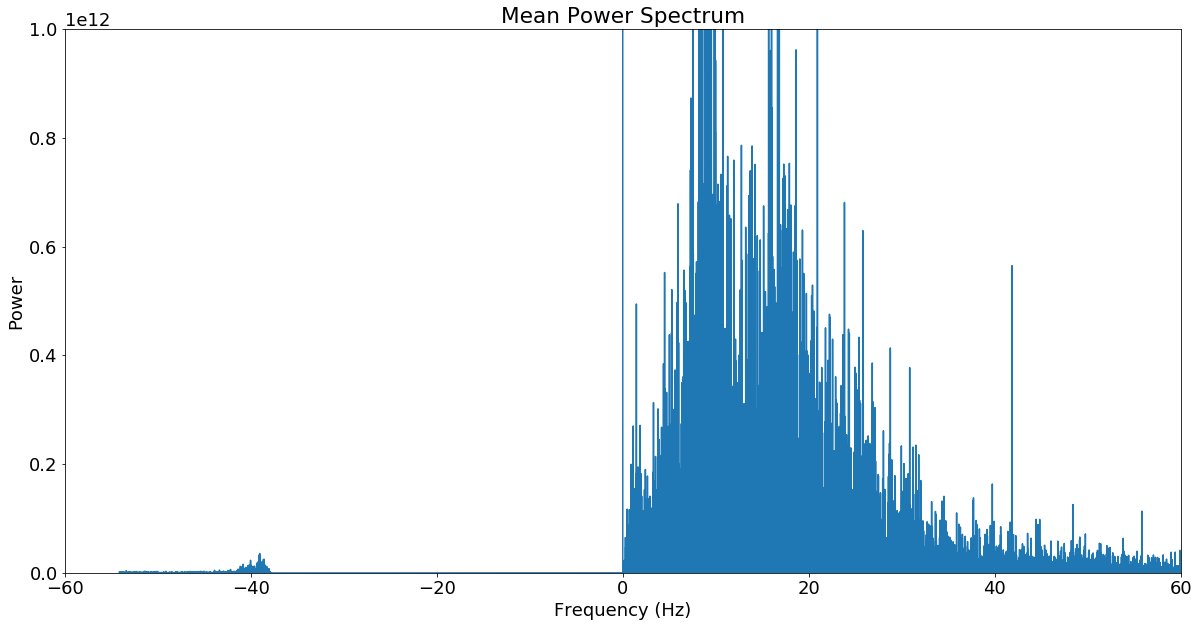

In [8]:
f, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(new_list2_mean, new_list_mean)
ax.set_xlim(-60,60)
ax.set_ylim(-5,1000000000000)
ax.set_title('Mean Power Spectrum')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')
plt.show()

In [9]:
#print(fft_freq[0])
print(fft_freq[0].shape)

(82944,)


In [10]:
tot_times = []
for ind in (range(len(file_index))):
    tmp_series = np.array(data_files[ind]['Time:512Hz'])
    tot_times.append( tmp_series[-1] - tmp_series[0])
    print( tmp_series[-1] - tmp_series[0])

161.998046875
120.998046875
212.185546875
222.560546875
980.685546875
249.560546875
228.060546875
295.998046875


In [11]:
sep_elec_data_dfs = []
for i in range(len(file_index)):
    tmp_ser = data_files[i]['Electrode']
    tmp_df = pd.DataFrame()
    for j in range(int(tot_times[i]//5)):
        new_col = np.array(tmp_ser[j*512*5:(j+1)*512*5])
        tmp_df['Epoch'+str(j)] = new_col
    print(tmp_df.columns)
    sep_elec_data_dfs.append(tmp_df)
sep_elec_data_dfs[0].head()
        

Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10', 'Epoch11', 'Epoch12',
       'Epoch13', 'Epoch14', 'Epoch15', 'Epoch16', 'Epoch17', 'Epoch18',
       'Epoch19', 'Epoch20', 'Epoch21', 'Epoch22', 'Epoch23', 'Epoch24',
       'Epoch25', 'Epoch26', 'Epoch27', 'Epoch28', 'Epoch29', 'Epoch30',
       'Epoch31'],
      dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10', 'Epoch11', 'Epoch12',
       'Epoch13', 'Epoch14', 'Epoch15', 'Epoch16', 'Epoch17', 'Epoch18',
       'Epoch19', 'Epoch20', 'Epoch21', 'Epoch22', 'Epoch23'],
      dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10', 'Epoch11', 'Epoch12',
       'Epoch13', 'Epoch14', 'Epoch15', 'Epoch16', 'Epoch17', 'Epoch18',
       'Epoch19', 'Epoch20', 'Epoch21', 'Epoch22', 'Epoch23', 'Epoch

Epoch0  Epoch1  Epoch2  Epoch3  Epoch4  Epoch5  Epoch6  Epoch7  Epoch8  \
0    -5.0   -37.0   340.0   -67.0  -243.0   168.0   -54.0  -341.0    53.0   
1    36.0    21.0   433.0   -24.0   -84.0   141.0  -126.0  -441.0    56.0   
2    67.0   128.0   432.0     6.0    25.0    67.0  -195.0  -453.0    60.0   
3    52.0   178.0   352.0   -76.0    25.0    -4.0  -155.0  -238.0    40.0   
4     8.0   128.0   276.0  -262.0    34.0   -36.0   -37.0    53.0    33.0   

   Epoch9   ...     Epoch22  Epoch23  Epoch24  Epoch25  Epoch26  Epoch27  \
0   -54.0   ...        17.0    114.0   -402.0    152.0    325.0    804.0   
1   -51.0   ...         3.0    166.0   -129.0     77.0    296.0    865.0   
2   -42.0   ...        12.0    181.0    161.0     60.0    197.0    890.0   
3   -39.0   ...        32.0    132.0    121.0    167.0     42.0    864.0   
4   -35.0   ...        58.0     65.0    124.0    137.0   -153.0    881.0   

   Epoch28  Epoch29  Epoch30  Epoch31  
0     99.0    236.0     66.0     99.0  
1    134.0     96.0    105.0     90.0  
2    125.0    -21.0    107.0     98.0  
3    138.0    -55.0     89.0    115.0  
4    225.0    -58.0     90.0    107.0  

[5 rows x 32 columns]

In [12]:
#Waldo Data Epoching
wal_data_files = []
for i in file_index:
    wal_data_files.append(pd.read_csv('clean_waldo'+str(i)+'.csv'))
wal_data_files[0] = wal_data_files[0][666:].reset_index(drop=True) #Data issue for first ~700 datapoints
    
wal_tot_times = []
for ind in (range(len(file_index))):
    tmp_series = np.array(wal_data_files[ind]['Time:512Hz'])
    wal_tot_times.append( tmp_series[-1] - tmp_series[0])
    print( tmp_series[-1] - tmp_series[0])

wal_sep_elec_data_dfs = []
for i in range(len(file_index)):
    tmp_ser = wal_data_files[i]['Electrode']
    tmp_df = pd.DataFrame()
    #print(tmp_ser.size)
    #print(tmp_ser[2560:5120])
    for j in range(int(wal_tot_times[i]//5)):
        new_col = np.array(tmp_ser[j*512*5:(j+1)*512*5])
        tmp_df['Epoch'+str(j)] = new_col
        print(j*512*5,(j+1)*512*5)
    print(tmp_df.head())
    wal_sep_elec_data_dfs.append(tmp_df)
#print(len(Wal_sep_elec_data_dfs))

32.134765625
30.498046875
44.623046875
101.373046875
56.248046875
52.748046875
64.810546875
89.810546875
0 2560
2560 5120
5120 7680
7680 10240
10240 12800
12800 15360
   Epoch0  Epoch1  Epoch2  Epoch3  Epoch4  Epoch5
0   233.0    38.0   107.0    48.0   -66.0    38.0
1   460.0    38.0   104.0    58.0   -22.0    37.0
2   473.0    38.0   106.0    90.0    10.0    37.0
3   310.0    38.0   104.0    87.0    28.0    38.0
4    65.0    37.0    92.0    34.0    61.0    38.0
0 2560
2560 5120
5120 7680
7680 10240
10240 12800
12800 15360
   Epoch0  Epoch1  Epoch2  Epoch3  Epoch4  Epoch5
0   225.0    60.0    59.0     2.0   -28.0   -17.0
1   204.0    56.0    57.0    20.0   -34.0    -2.0
2   133.0    20.0    68.0    39.0   -37.0   -11.0
3    86.0    -4.0    54.0    49.0   -28.0   -22.0
4    74.0   -38.0    57.0    66.0    -5.0     1.0
0 2560
2560 5120
5120 7680
7680 10240
10240 12800
12800 15360
15360 17920
17920 20480
   Epoch0  Epoch1  Epoch2  Epoch3  Epoch4  Epoch5  Epoch6  Epoch7
0    74.0    11.0  

In [13]:
avg_wal_power_bands = []
std_wal_power_bands = []
df = wal_sep_elec_data_dfs[0]
freq_df = np.fft.fftfreq(df['Epoch0'].shape[0], 1/512)

print(max(freq_df), min(freq_df), len(freq_df))
#4-7Hz Theta
theta_start_ind = int(np.argwhere(freq_df == 4.0))
theta_end_ind = int(np.argwhere(freq_df == 7.0))
print(theta_start_ind, theta_end_ind)
#0.2->4Hz Delta
delta_start_ind = int(np.argwhere(freq_df == 0.2))
delta_end_ind = int(np.argwhere(freq_df == 4.0))
print(delta_start_ind, delta_end_ind)
#8-12 Alpha
alpha_start_ind = int(np.argwhere(freq_df == 8.0))
alpha_end_ind = int(np.argwhere(freq_df == 12.0))
print(alpha_start_ind, alpha_end_ind)
#30-100Hz Gamma (artifact?)

for i in range(len(file_index)):
    tmp_df = wal_sep_elec_data_dfs[i]
    pow_df = pd.DataFrame()
    for col in tmp_df.columns:
        pow_df[col] = np.abs(np.fft.fft(tmp_df[col]))**2
    theta_pwrs = []
    delta_pwrs = []
    alpha_pwrs = []
    for col in pow_df.columns:
        tot_pow = sum(pow_df[col][:int(len(pow_df[col])/2)]) #calc total sum (first half of power-only the pos)
        #grab theta band
        #sum and normalize
        #place in list
        theta_pwrs.append((sum(pow_df[col][theta_start_ind:theta_end_ind]))/tot_pow)
        #reapeat last 3 steps for alpha and delta
        delta_pwrs.append((sum(pow_df[col][delta_start_ind:delta_end_ind]))/tot_pow)
        alpha_pwrs.append((sum(pow_df[col][alpha_start_ind:alpha_end_ind]))/tot_pow)
        
    #print(theta_pwrs,np.mean(theta_pwrs),np.std(theta_pwrs))
    #avg theta band
    #calc std theta
    wal_band_avg = [np.mean(theta_pwrs), np.mean(delta_pwrs), np.mean(alpha_pwrs)]
    wal_band_std = [np.std(theta_pwrs), np.std(delta_pwrs), np.std(alpha_pwrs)]
    avg_wal_power_bands.append(wal_band_avg)
    std_wal_power_bands.append(wal_band_std)
        

255.8 -256.0 2560
20 35
1 20
40 60


In [14]:
print(avg_wal_power_bands)

[[0.11593889408183956, 0.7526004157335021, 0.033411260283120706], [0.0959848659581823, 0.12936162482119554, 0.04765816244473991], [0.03611183117717102, 0.1568064657554408, 0.021510100515853815], [0.10492088008674823, 0.1726825342170894, 0.04623015237428359], [0.1696429284868354, 0.5366549363610648, 0.05684356304919442], [0.07497679228190168, 0.1279338173737355, 0.04659588640624958], [0.09211526668048099, 0.1877450392806714, 0.0534363925879029], [0.12130340466308472, 0.20191651605795324, 0.055960870910443834]]


In [15]:
lst_all_lbl_data = []
for i in range(len(file_index)):
    lst_subj_lbl = []
    eating_sep_df = sep_elec_data_dfs[i]
    avg_wal_pwr = avg_wal_power_bands[i]
    std_wal_pwr = std_wal_power_bands[i]
    print('subject: '+ str(i+1))
    theta_pwrs = []
    delta_pwrs = []
    alpha_pwrs = []
    for col in eating_sep_df.columns:
        #print(col)
        tmp_epoch = eating_sep_df[col]
        epoch_pwr = np.abs(np.fft.fft(tmp_epoch))**2
        tot_pow = sum(epoch_pwr[:int(len(epoch_pwr)/2)]) #calc total sum (first half of power-only the pos)
        #grab theta band
        #sum and normalize
        #place in list
        theta = (sum(epoch_pwr[theta_start_ind:theta_end_ind]))/tot_pow
        delta = (sum(epoch_pwr[delta_start_ind:delta_end_ind]))/tot_pow
        alpha = (sum(epoch_pwr[alpha_start_ind:alpha_end_ind]))/tot_pow
        theta_pwrs.append(theta)
        #reapeat last 3 steps for alpha and delta
        delta_pwrs.append(delta)
        alpha_pwrs.append(alpha)
        band_pwrs = np.array([theta, delta, alpha])
        
        z_scores = np.array((band_pwrs - np.array(avg_wal_pwr))/np.array(std_wal_pwr))
        #print(z_scores)
        z_score_mean = np.mean(abs(z_scores))
        #print(z_score_mean)
        if z_score_mean > 1.25: #p-val < 0.1056
            lst_subj_lbl.append(0)
        else:
            lst_subj_lbl.append(1)
    df_labeled_band = pd.DataFrame(index = [eating_sep_df.columns])
    df_labeled_band['Label'] = lst_subj_lbl
    df_labeled_band['Theta_Power'] = theta_pwrs
    df_labeled_band['Delta_Power'] = delta_pwrs
    df_labeled_band['Alpha_Power'] = alpha_pwrs
    print(df_labeled_band['Label'].value_counts())
    lst_all_lbl_data.append(df_labeled_band)
        

subject: 1
0    27
1     5
Name: Label, dtype: int64
subject: 2
0    14
1    10
Name: Label, dtype: int64
subject: 3
0    37
1     5
Name: Label, dtype: int64
subject: 4
1    36
0     8
Name: Label, dtype: int64
subject: 5
1    148
0     48
Name: Label, dtype: int64
subject: 6
1    25
0    24
Name: Label, dtype: int64
subject: 7
1    32
0    13
Name: Label, dtype: int64
subject: 8
0    35
1    24
Name: Label, dtype: int64


In [16]:
df_labeled_band

Label  Theta_Power  Delta_Power  Alpha_Power
Epoch0       0     0.074246     0.472958     0.007322
Epoch1       0     0.014198     0.083797     0.017078
Epoch2       0     0.031117     0.592101     0.021721
Epoch3       1     0.075534     0.195622     0.033216
Epoch4       0     0.068198     0.450581     0.012637
Epoch5       0     0.018856     0.026128     0.011471
Epoch6       0     0.021322     0.470363     0.013237
Epoch7       0     0.018718     0.026720     0.008598
Epoch8       0     0.034592     0.037695     0.011649
Epoch9       0     0.032347     0.166549     0.021641
Epoch10      0     0.030991     0.034060     0.021763
Epoch11      1     0.064804     0.188693     0.022752
Epoch12      0     0.050930     0.324354     0.024411
Epoch13      0     0.103518     0.487139     0.022461
Epoch14      0     0.068027     0.308894     0.016928
Epoch15      1     0.024789     0.196654     0.031922
Epoch16      0     0.041619     0.041111     0.023563
Epoch17      1     0.097105     0.170400     0.025203
Epoch18      0     0.022805     0.111146     0.021437
Epoch19      0     0.069017     0.130099     0.016026
Epoch20      1     0.101307     0.208632     0.032244
Epoch21      0     0.085261     0.535054     0.028443
Epoch22      1     0.092181     0.153863     0.058429
Epoch23      1     0.055165     0.144379     0.036661
Epoch24      0     0.043102     0.065066     0.026520
Epoch25      0     0.039844     0.062495     0.021727
Epoch26      0     0.045454     0.070768     0.025515
Epoch27      1     0.122836     0.367510     0.026295
Epoch28      1     0.041730     0.091861     0.039367
Epoch29      1     0.057794     0.231440     0.025039
Epoch30      1     0.033549     0.101495     0.038389
Epoch31      0     0.054011     0.111956     0.024018
Epoch32      1     0.095624     0.238392     0.047885
Epoch33      0     0.054479     0.089911     0.025777
Epoch34      1     0.081880     0.198331     0.046951
Epoch35      1     0.061149     0.125473     0.054341
Epoch36      0     0.085923     0.579644     0.023032
Epoch37      0     0.169252     0.436186     0.021096
Epoch38      0     0.026238     0.088210     0.014300
Epoch39      1     0.042551     0.259015     0.029711
Epoch40      0     0.036531     0.099780     0.024894
Epoch41      1     0.089232     0.226066     0.035890
Epoch42      0     0.064977     0.329234     0.029190
Epoch43      0     0.126039     0.673236     0.014373
Epoch44      0     0.042909     0.078817     0.017878
Epoch45      1     0.080151     0.155696     0.059478
Epoch46      0     0.040192     0.124332     0.020740
Epoch47      0     0.194433     0.460875     0.031505
Epoch48      0     0.135098     0.552523     0.032297
Epoch49      1     0.148668     0.367382     0.032541
Epoch50      1     0.102257     0.137671     0.028476
Epoch51      0     0.030267     0.140307     0.021685
Epoch52      1     0.071046     0.276253     0.027077
Epoch53      0     0.028876     0.060895     0.015818
Epoch54      1     0.078958     0.331169     0.027652
Epoch55      1     0.078893     0.215476     0.027861
Epoch56      1     0.045726     0.103073     0.039363
Epoch57      1     0.077748     0.194818     0.028387
Epoch58      0     0.102195     0.649174     0.030803

In [17]:
#4-7Hz Theta
#0.1->4Hz Delta
#8-12 Alpha
#30-100Hz Gamma (artifact?)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, metrics
import statsmodels.api as sm


Subject 1 Kfold 1
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
                                  Results: Logit
Model:                    Logit                 Pseudo R-squared:      1.000      
Dependent Variable:       y                     AIC:                   8.0003     
Date:                     2019-03-16 16:30      BIC:                   12.1784    
No. Observations:         21                    Log-Likelihood:        -0.00015839
Df Model:                 3                     LL-Null:               -10.225    
Df Residuals:             17                    LLR p-value:           0.00013693 
Converged:                1.0000                Scale:                 1.0000     
----------------------------------------------------------------------------------
        Coef.       Std.Err.        z    P>|z|        [0.025           0.975]     
-------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: Co


[False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True]
train error:  0.07142857142857142 test error:  0.14285714285714285


Subject 3 Kfold 3
         Current function value: 0.128395
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.623    
Dependent Variable: y                AIC:              15.1901  
Date:               2019-03-16 16:30 BIC:              20.5189  
No. Observations:   28               Log-Likelihood:   -3.5951  
Df Model:           3                LL-Null:          -9.5340  
Df Residuals:       24               LLR p-value:      0.0078134
Converged:          0.0000           Scale:            1.0000   
-----------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

0.16923076923076924


Subject 5 Scores:
   Train_Error  Test_Error
0     0.084615    0.075758
1     0.099237    0.092308
2     0.083969    0.169231

Subject 6 Kfold 1
         Current function value: 0.625080
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.096  
Dependent Variable: y                AIC:              48.0051
Date:               2019-03-16 16:30 BIC:              53.8681
No. Observations:   32               Log-Likelihood:   -20.003
Df Model:           3                LL-Null:          -22.118
Df Residuals:       28               LLR p-value:      0.23756
Converged:          0.0000           Scale:            1.0000 
---------------------------------------------------------------
          Coef.   Std.Err.     z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------
const    -1.9244    1.2942 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check



Subject 8 Kfold 1
         Current function value: 0.504263
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.272    
Dependent Variable: y                AIC:              47.3325  
Date:               2019-03-16 16:30 BIC:              53.9868  
No. Observations:   39               Log-Likelihood:   -19.666  
Df Model:           3                LL-Null:          -27.020  
Df Residuals:       35               LLR p-value:      0.0020847
Converged:          0.0000           Scale:            1.0000   
-----------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
const      -2.3533    1.2120  -1.9416  0.0522   -4.7289    0.0222
x1         49.7748   21.8195   2.2812  0.0225    7.0093   92.5402
x2         -9.6358   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


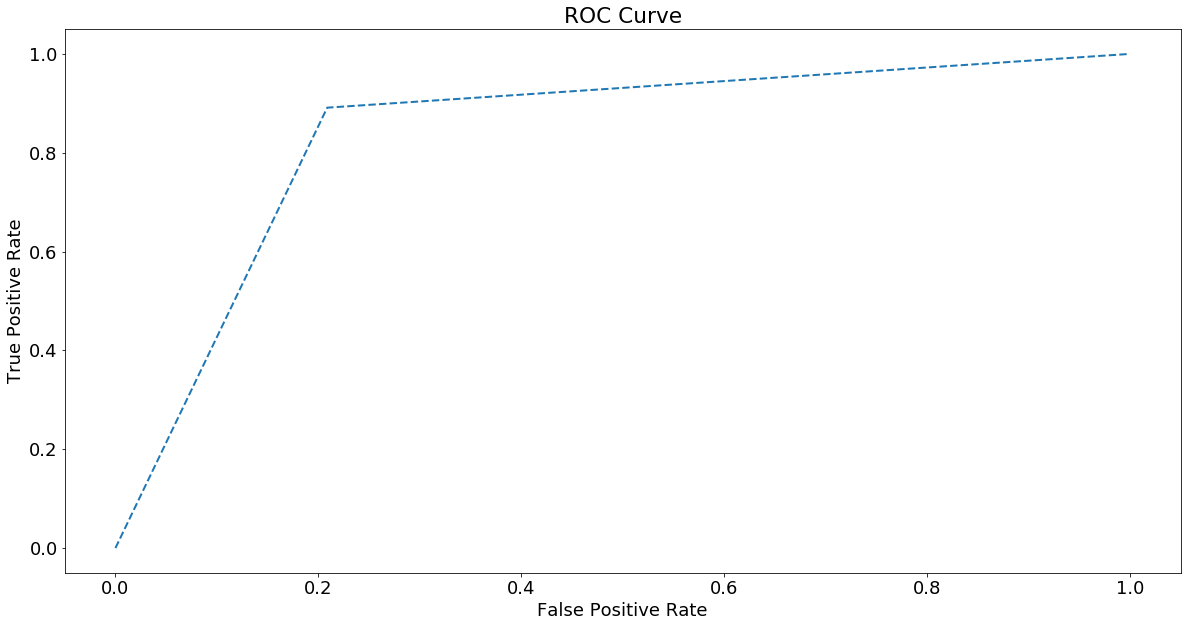

In [28]:
lst_all_errors = []
true_y = [] #list for y
preds = [] #list for predictions
for i in range(len(lst_all_lbl_data)):
    print()
    #print('Subject ' + str(i+1))
    tmp_df = lst_all_lbl_data[i].sample(frac=1)
    tmp_y = tmp_df['Label'].values
    tmp_Xs = tmp_df[['Theta_Power', 'Delta_Power', 'Alpha_Power']].values
    kf = model_selection.KFold(n_splits=3, shuffle=False, random_state=None)
    kf.get_n_splits(tmp_Xs)
    X_tr = []
    X_te = []
    y_tr = []
    y_te = []
    tr_errors = []
    te_errors = []
    for tr_ind, te_ind in kf.split(tmp_Xs):
        X_tr.append(tmp_Xs[tr_ind])
        X_te.append(tmp_Xs[te_ind])
        y_tr.append(tmp_y[tr_ind])
        y_te.append(tmp_y[te_ind])
    
    for j in range(len(X_tr)):
        print('Subject ' + str(i+1) + ' Kfold %s' % (j+1,))
        Xc_tr = sm.add_constant(X_tr[j])
        Xc_te = sm.add_constant(X_te[j])
        tmp_mod = sm.Logit(y_tr[j], Xc_tr) #Logit
        tmp_res = tmp_mod.fit(method = 'bfgs') #fit
        print(tmp_res.summary2())
        y_hat_tr = tmp_res.predict(Xc_tr) > 0.5
        y_hat_te = tmp_res.predict(Xc_te) > 0.5
        print(y_hat_tr)
        num_tr_wrong = sum(y_hat_tr != y_tr[j])
        num_te_wrong = sum(y_hat_te != y_te[j])
        tr_err = num_tr_wrong / len(y_tr[j])
        te_err = num_te_wrong / len(y_te[j])
        tr_errors.append(tr_err)
        te_errors.append(te_err)
        print('train error: ', tr_err, 'test error: ', te_err)
        print('\n')
        
        true_y.extend(y_te[j]) #add current y list to collective list
        preds.extend(y_hat_te) #add current predictions to collective list

    error_df = pd.DataFrame()
    error_df['Train_Error'] = tr_errors
    error_df['Test_Error'] = te_errors
    print('Subject ' + str(i+1) + ' Scores:')
    print(error_df)
    lst_all_errors.append(error_df)
#ROC Curve plot
fpr, tpr, threshold = metrics.roc_curve(true_y, preds)
f, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot(fpr, tpr, color='tab:blue', lw=2, linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
plt.show()

In [20]:
#testing how to do an ROC Curve
'''
fpr, tpr, threshold = metrics.roc_curve(y_hat_te, y_te[j])
plt.plot(fpr, tpr, color='tab:blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
'''

"\nfpr, tpr, threshold = metrics.roc_curve(y_hat_te, y_te[j])\nplt.plot(fpr, tpr, color='tab:blue', lw=2, linestyle='--')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve')\nplt.show()\n"